# Install Environment

# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset yang digunakan pada proyek ini berasal dari Kaggle dengan judul “Extrovert vs Introvert Behavior Data”. Dataset ini berisi data perilaku individu yang digunakan untuk mengidentifikasi kecenderungan kepribadian seseorang berdasarkan pola aktivitas dan interaksi sosialnya.

   https://www.kaggle.com/datasets/rakeshkapilavai/extrovert-vs-introvert-behavior-data

# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("default")

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
import kagglehub

path = kagglehub.dataset_download(
    "rakeshkapilavai/extrovert-vs-introvert-behavior-data"
)

df = pd.read_csv(path + "/personality_dataset.csv")
df.head()


c:\Users\Adinata\AppData\Local\Programs\Python\Python311\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


,Time_spent_Alone,Stage_fear,Social_event_attendance,Going_outside,Drained_after_socializing,Friends_circle_size,Post_frequency,Personality
0,4.0,No,4.0,6.0,No,13.0,5.0,Extrovert
1,9.0,Yes,0.0,0.0,Yes,0.0,3.0,Introvert
2,9.0,Yes,1.0,2.0,Yes,5.0,2.0,Introvert
3,0.0,No,6.0,7.0,No,14.0,8.0,Extrovert
4,3.0,No,9.0,4.0,No,8.0,5.0,Extrovert


## 3.1 Validasi Dataset

In [3]:
df.shape

(2900, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2900 entries, 0 to 2899
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Time_spent_Alone           2837 non-null   float64
 1   Stage_fear                 2827 non-null   object 
 2   Social_event_attendance    2838 non-null   float64
 3   Going_outside              2834 non-null   float64
 4   Drained_after_socializing  2848 non-null   object 
 5   Friends_circle_size        2823 non-null   float64
 6   Post_frequency             2835 non-null   float64
 7   Personality                2900 non-null   object 
dtypes: float64(5), object(3)
memory usage: 181.4+ KB


In [5]:
df.isnull().sum()

Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## 4.1 Distribusi Label & Statistik

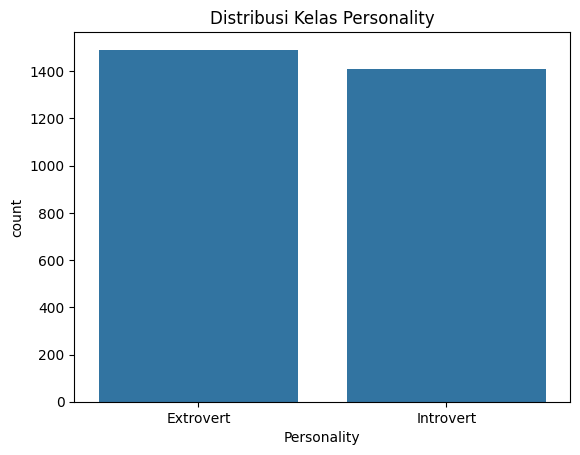

In [6]:
sns.countplot(data=df, x="Personality")
plt.title("Distribusi Kelas Personality")
plt.show()

In [7]:
df.describe()

,Time_spent_Alone,Social_event_attendance,Going_outside,Friends_circle_size,Post_frequency
count,2837.000000,2838.000000,2834.000000,2823.000000,2835.000000
mean,4.505816,3.963354,3.000000,6.268863,3.564727
std,3.479192,2.903827,2.247327,4.289693,2.926582
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,1.000000,3.000000,1.000000
50%,4.000000,3.000000,3.000000,5.000000,3.000000
75%,8.000000,6.000000,5.000000,10.000000,6.000000
max,11.000000,10.000000,7.000000,15.000000,10.000000


## 4.2 Korelasi Fitur Numerik

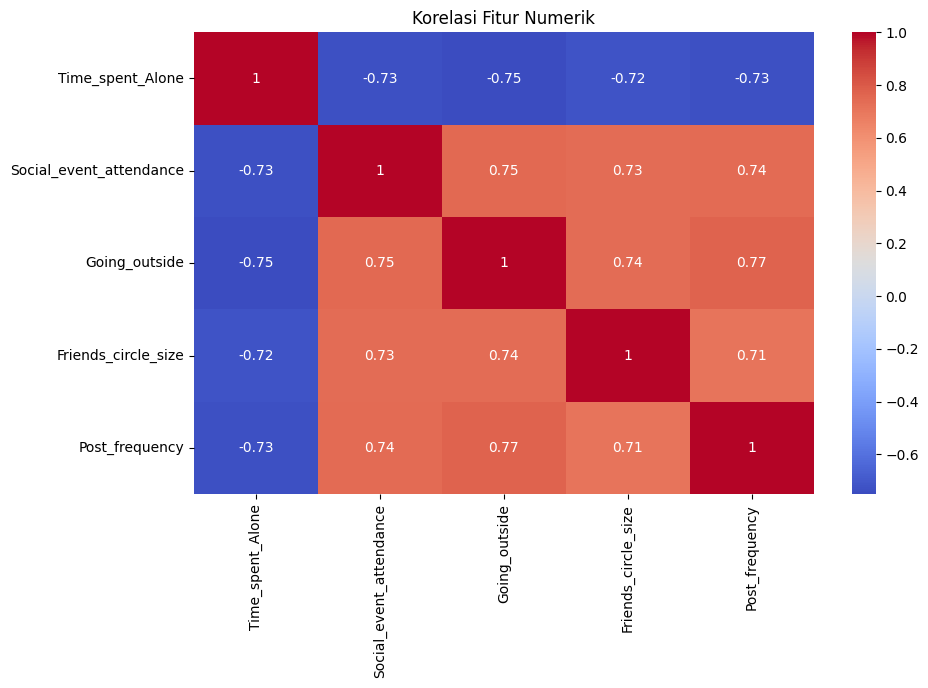

In [8]:
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Korelasi Fitur Numerik")
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [10]:
# ================================
# PREPROCESSING DATASET FINAL
# ================================

import pandas as pd
import numpy as np

# 1. Copy dari data mentah
df_processed = df.copy()

# -------------------------------
# 2. Normalisasi kolom kategorikal
# -------------------------------
categorical_cols = [
    "Stage_fear",
    "Drained_after_socializing",
    "Personality"
]

for col in categorical_cols:
    df_processed[col] = (
        df_processed[col]
        .astype(str)
        .str.strip()
        .str.capitalize()
    )

# -------------------------------
# 3. Validasi nilai (WAJIB cek)
# -------------------------------
print("Value counts Stage_fear:")
print(df_processed["Stage_fear"].value_counts(), "\n")

print("Value counts Drained_after_socializing:")
print(df_processed["Drained_after_socializing"].value_counts(), "\n")

print("Value counts Personality:")
print(df_processed["Personality"].value_counts(), "\n")

print("Jumlah baris awal:", len(df_processed))

# -------------------------------
# 4. Encoding kategorikal
# -------------------------------
df_processed["Stage_fear"] = df_processed["Stage_fear"].map({
    "Yes": 1,
    "No": 0
})

df_processed["Drained_after_socializing"] = df_processed["Drained_after_socializing"].map({
    "Yes": 1,
    "No": 0
})

df_processed["Personality"] = df_processed["Personality"].map({
    "Introvert": 0,
    "Extrovert": 1
})

# -------------------------------
# 5. Cek missing values
# -------------------------------
print("\nJumlah NaN per kolom:")
print(df_processed.isna().sum())

# -------------------------------
# 6. Tangani missing values
# (drop karena dataset besar & submission-oriented)
# -------------------------------
df_processed = df_processed.dropna()

print("\nJumlah baris setelah dropna:", len(df_processed))

# -------------------------------
# 7. Pastikan semua kolom numerik
# -------------------------------
print("\nTipe data akhir:")
print(df_processed.dtypes)

# -------------------------------
# 8. Simpan hasil preprocessing
# -------------------------------
df_processed.to_csv("personality_preprocessed.csv", index=False)
print("\nDataset preprocessing berhasil disimpan: personality_preprocessed.csv")


Value counts Stage_fear:
Stage_fear
No     1417
Yes    1410
Nan      73
Name: count, dtype: int64 

Value counts Drained_after_socializing:
Drained_after_socializing
No     1441
Yes    1407
Nan      52
Name: count, dtype: int64 

Value counts Personality:
Personality
Extrovert    1491
Introvert    1409
Name: count, dtype: int64 

Jumlah baris awal: 2900

Jumlah NaN per kolom:
Time_spent_Alone             63
Stage_fear                   73
Social_event_attendance      62
Going_outside                66
Drained_after_socializing    52
Friends_circle_size          77
Post_frequency               65
Personality                   0
dtype: int64

Jumlah baris setelah dropna: 2477

Tipe data akhir:
Time_spent_Alone             float64
Stage_fear                   float64
Social_event_attendance      float64
Going_outside                float64
Drained_after_socializing    float64
Friends_circle_size          float64
Post_frequency               float64
Personality                    int64
dty

In [11]:
print(df_processed.isna().sum())

Time_spent_Alone             0
Stage_fear                   0
Social_event_attendance      0
Going_outside                0
Drained_after_socializing    0
Friends_circle_size          0
Post_frequency               0
Personality                  0
dtype: int64


In [12]:
df_processed.to_csv("personality_preprocessed.csv", index=False)
print("Dataset preprocessing berhasil disimpan (clean, tanpa NaN)")

Dataset preprocessing berhasil disimpan (clean, tanpa NaN)


# **6. Split Fitur & Target**

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df_processed.drop("Personality", axis=1)
y = df_processed["Personality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [14]:
# SCALING FITUR NUMERIK
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [15]:
import joblib
import os

os.makedirs("artifacts", exist_ok=True)

joblib.dump(scaler, "artifacts/scaler.pkl")

['artifacts/scaler.pkl']

In [16]:
# VALIDASI HASIL PREPROCESSING
X_train_scaled.shape, X_test_scaled.shape

((1981, 7), (496, 7))

In [17]:
# SIMPAN DATASET PREPROCESSING (KRUSIAL)

In [18]:
X_train_df = pd.DataFrame(X_train_scaled, columns=X.columns)
X_test_df  = pd.DataFrame(X_test_scaled, columns=X.columns)

X_train_df["Personality"] = y_train.values
X_test_df["Personality"]  = y_test.values

X_train_df.to_csv("artifacts/train_preprocessed.csv", index=False)
X_test_df.to_csv("artifacts/test_preprocessed.csv", index=False)
